In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
from SpectralMechanicsAnalysis.simulations import simulate_trajectory
from SpectralMechanicsAnalysis.models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
from SpectralMechanicsAnalysis.analyze_data import get_peak_indices, initial_guess_maxwell, initial_guess_kelvin_voigt, initial_guess_fractional_kelvin_voigt, fit_maxwell, fit_kelvin_voigt, fit_fractional_kelvin_voigt, get_surprise
import matplotlib.pyplot as plt
import numpy as np
from SpectralMechanicsAnalysis.data_handeling import Data

In [2]:
x_data = np.load("../data/Hydrogel_25_khz_x.npy")
#x_data = np.load("../data/tweezeramplitude_000_x_66_kHz.npy")[:100000]
#make t-data under the assumption that measurements are taken at 1 kHz
t_data = np.linspace(0, len(x_data)/25000, len(x_data))


data = Data(t_data, x_data, typical_peak_number=1, max_peak_percentage=.9, log_weighted=True, unweighted_postfit = True)
data.create_PSD()
data.bayesian_update()

In [3]:
print(data.posterior_maxwell)
print(data.posterior_kelvin_voigt)
print(data.posterior_fractional_kelvin_voigt)

3.8092874179008867e-181
6.392723291073207e-137
1.0


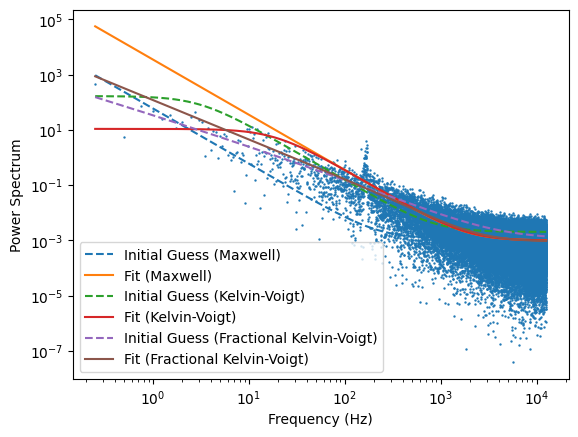

In [4]:
data.plot_psd()

In [5]:
data.peaks = []
data.max_peak_percentage = 0.8
data.find_peaks(max_iter=5)

In [6]:
data.create_reconstructed_data()

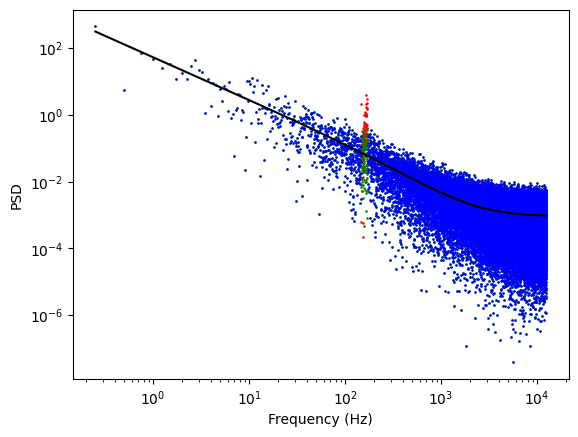

In [7]:
frequencies = data.frequencies
PSD = data.PSD
peak_idx = get_peak_indices(data.peaks)
non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies[peak_idx], PSD[peak_idx], s=.7,c='r')
plt.scatter(frequencies, data.reconstructed_PSD, c='g', s=.7)
plt.scatter(frequencies[non_peak_idx], PSD[non_peak_idx], s=.5,c='b', label='Hydrogel 1 kHz')

plt.plot(frequencies, data.fit_function(frequencies, data.fit_params), c='k')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()